In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

/tmp/ipykernel_20446/1024211221.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-26 15:15:20.160740: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 15:15:20.199109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 15:15

In [2]:
# 예시 
"""
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 padding="same", activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")
])"""

'\nmodel = tf.keras.models.Sequential([\n    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),\n                 padding="same", activation="relu", input_shape=(28, 28, 1)),\n    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),\n    layers.Conv2D(64, (2, 2), activation="relu", padding="same"),\n    layers.MaxPooling2D(pool_size=(2, 2)),\n    layers.Dropout(0.25),\n    layers.Flatten(),\n    layers.Dense(1000, activation="relu"),\n    layers.Dense(10, activation="softmax")\n])'

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((60000, 28, 28, 1)) 
x_test = x_test.reshape((10000, 28, 28, 1))



In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 padding="same", activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

2024-02-26 15:15:22.636341: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 15:15:22.664227: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 15:15:22.664394: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
metrics=["accuracy"])

strat_time = time.time()

hist = model.fit(x_train, y_train, epochs=5, verbose=1,
                 validation_data=(x_test, y_test))
print(time.time() - strat_time)


Epoch 1/5


2024-02-26 15:15:25.253423: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-02-26 15:15:27.120839: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
2024-02-26 15:15:28.688135: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f009e3986c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-26 15:15:28.688154: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-26 15:15:28.692545: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708928128.781388   20516 device_compiler.h:186] Compiled clust

1875/1875 [==============================] - 12s 4ms/step - loss: 0.4007 - accuracy: 0.8535 - val_loss: 0.3134 - val_accuracy: 0.8841
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.8995 - val_loss: 0.2653 - val_accuracy: 0.9047
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2303 - accuracy: 0.9142 - val_loss: 0.2482 - val_accuracy: 0.9122
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1991 - accuracy: 0.9258 - val_loss: 0.2331 - val_accuracy: 0.9152
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1723 - accuracy: 0.9346 - val_loss: 0.2412 - val_accuracy: 0.9126
33.25128698348999


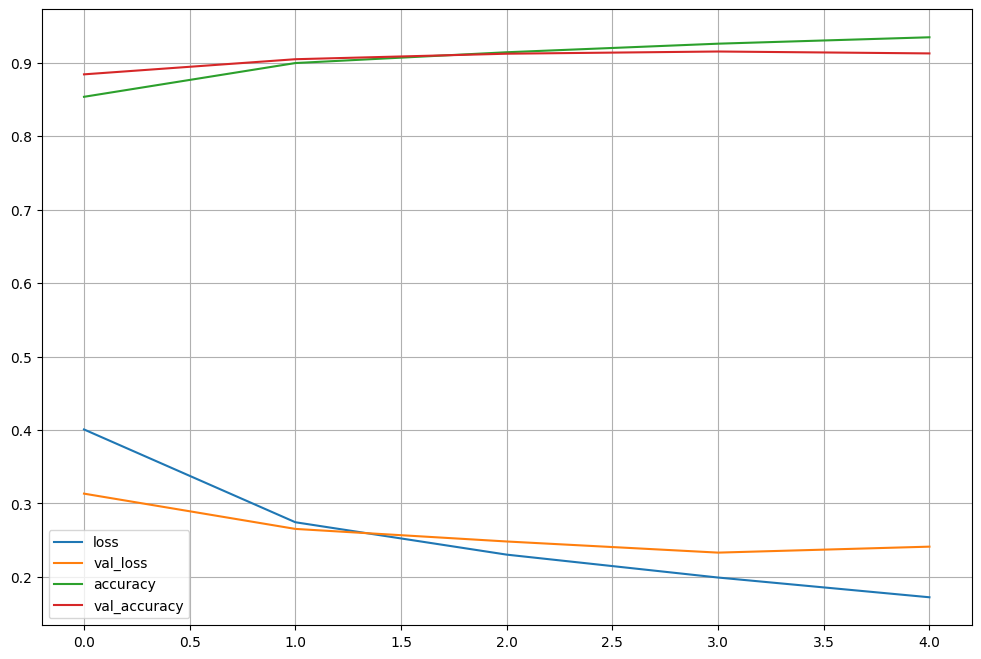

In [6]:
plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]

plt.figure(figsize=(12,8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [7]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 0s 995us/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [8]:
score = model.evaluate(x_test, y_test)
print(score[0])
print(score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2412 - accuracy: 0.9126
0.2411832958459854
0.9125999808311462


In [9]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

874

In [10]:
samples = random.choices(population=wrong_result, k = 16)
samples

[2509,
 3955,
 4775,
 6958,
 3132,
 5123,
 639,
 3209,
 4138,
 5853,
 7876,
 5520,
 5686,
 2839,
 2462,
 3955]

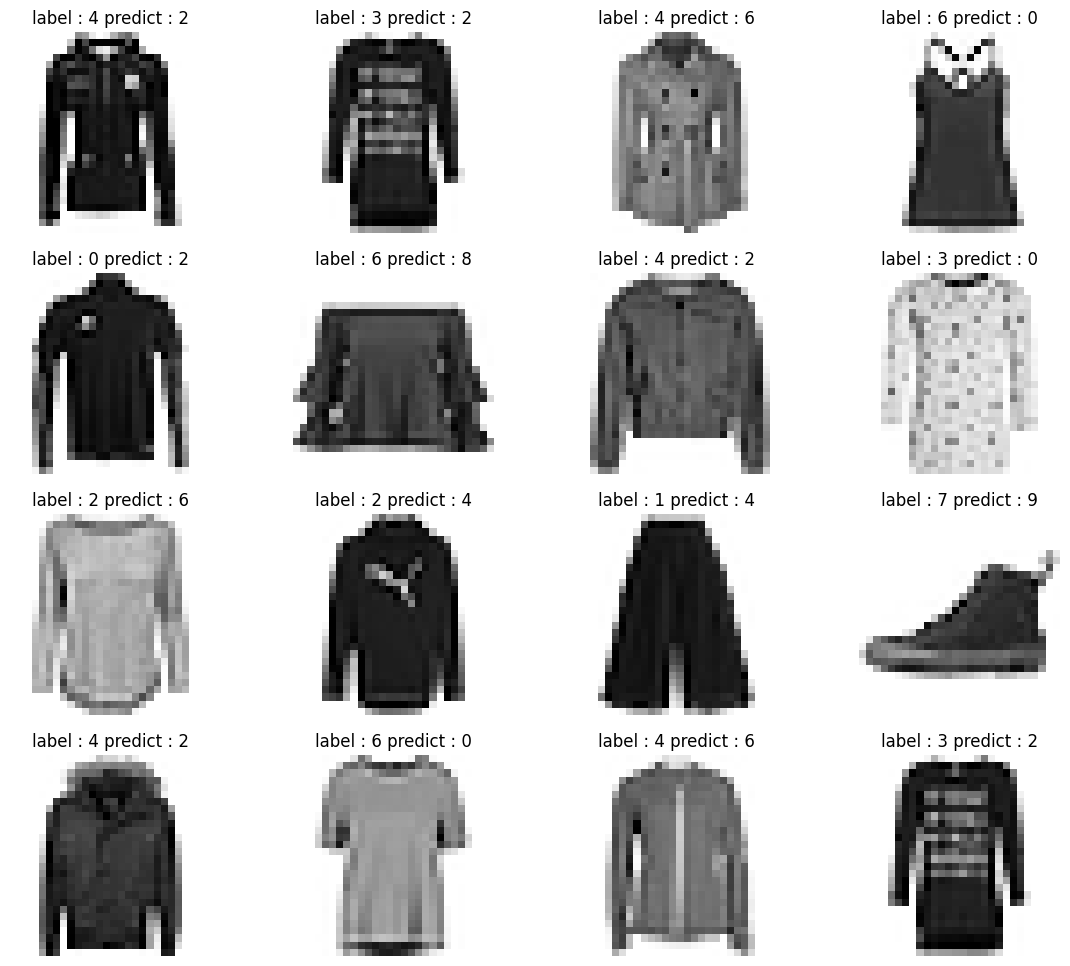

In [11]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap="Greys", interpolation="nearest")
    plt.title("label : " + str(y_test[n]) + " predict : " + str(predicted_labels[n]))
    plt.axis("off")

plt.show()

In [12]:
model.save("Fashion_MNIST_CNN_model.h5")

/home/rds/venv/opencv_venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
